<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/workshop/Day_4_RNN_GNN_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch==2.0.1 torchtext==0.15.2 portalocker==2.8.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


Simulate  batch-size=3 with sequences of length=10, where single data input is 5 dimensional

In [ ]:
## (batch size, sequence length, input_size)

X = torch.randint(1, 10, (3, 10, 5), dtype = torch.float32)
y = torch.tensor([1, 0, 1], dtype = torch.long)

In [ ]:
print(X.shape, X)
print(y.shape, y)
y

torch.Size([3, 10, 5]) tensor([[[8., 2., 1., 3., 6.],
         [4., 8., 8., 7., 1.],
         [8., 9., 4., 7., 5.],
         [8., 2., 3., 6., 5.],
         [9., 7., 1., 6., 9.],
         [5., 5., 8., 5., 5.],
         [2., 9., 2., 2., 8.],
         [7., 3., 9., 9., 1.],
         [5., 3., 1., 6., 1.],
         [3., 2., 2., 1., 9.]],

        [[2., 1., 8., 4., 6.],
         [8., 8., 3., 1., 8.],
         [9., 1., 8., 3., 7.],
         [6., 5., 5., 3., 1.],
         [3., 8., 1., 5., 3.],
         [8., 5., 2., 6., 8.],
         [8., 6., 5., 1., 9.],
         [8., 9., 2., 6., 1.],
         [9., 3., 7., 2., 6.],
         [5., 2., 1., 6., 9.]],

        [[6., 3., 8., 7., 6.],
         [8., 5., 1., 9., 6.],
         [1., 2., 3., 1., 7.],
         [6., 2., 7., 7., 9.],
         [5., 7., 9., 5., 2.],
         [2., 5., 6., 2., 3.],
         [7., 7., 7., 5., 6.],
         [4., 5., 5., 8., 5.],
         [6., 1., 2., 8., 6.],
         [5., 3., 3., 1., 1.]]])
torch.Size([3]) tensor([1, 0, 1])


tensor([1, 0, 1])

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html

In [ ]:
## input_size, hidden_size, num_layers
rnn = nn.RNN(5, 3, 2, batch_first = True, nonlinearity = 'relu')

In [ ]:
output, hidden = rnn(X)  ## (batch_size, sequence_length, input_size)

In [ ]:
print("Output State:", output.shape, output, "\n\n")    ## (batch_size, sequence_length, output_size)


## the final hidden state for each element in the batch.
print("Hidden State:", hidden.shape, hidden)    ## (num_layers, batch_size, output_size)

Output State: torch.Size([3, 10, 3]) tensor([[[0.0000, 1.4807, 0.6795],
         [0.0000, 0.0000, 0.0000],
         [0.3624, 0.3062, 0.0000],
         [0.3615, 0.0000, 0.0000],
         [0.0000, 2.1668, 0.7849],
         [0.0000, 1.1149, 0.0000],
         [0.0000, 0.4459, 0.0000],
         [0.0000, 0.9631, 0.0000],
         [0.0000, 1.0516, 0.0000],
         [0.0000, 1.8234, 0.4883]],

        [[0.0000, 1.6229, 0.7770],
         [0.0000, 1.7532, 0.1737],
         [0.1203, 0.0000, 0.0000],
         [0.0000, 1.2227, 0.4531],
         [0.0000, 0.7418, 0.0000],
         [0.0000, 2.4568, 0.8396],
         [0.2108, 0.0781, 0.0000],
         [0.0297, 1.2762, 0.5030],
         [0.1383, 0.3183, 0.0000],
         [0.0000, 1.6335, 0.1168]],

        [[0.0467, 0.1129, 0.0000],
         [0.0000, 1.4788, 0.7272],
         [0.0000, 1.1455, 0.0000],
         [0.2792, 0.0596, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 2.5418, 0.4779],
         [0.0000, 0.0000, 0.0000],
         [0.00

In [ ]:
## the learnable input-hidden weights of the rnn layer, of shape (hidden_size, input_size)
rnn.weight_ih_l0

Parameter containing:
tensor([[ 0.1259, -0.1443, -0.2956,  0.5486,  0.3926],
        [-0.4711,  0.4479,  0.5329,  0.0552, -0.4238],
        [ 0.0595, -0.5001,  0.1705,  0.4033, -0.3533]], requires_grad=True)

In [ ]:
class simplernn(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(simplernn, self).__init__()
    self.rnn = nn.RNN(input_size, hidden_size, batch_first = True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    out, hidd = self.rnn(x)
    final_hidden_state = hidd[-1]
    return self.fc(final_hidden_state)

In [ ]:
input_size = 5
hidden_size = 3
output_size = 2

model = simplernn(input_size, hidden_size, output_size)



In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.1)

In [ ]:
# forward pass
for epoch in range(3):
  running_loss = 0
  model.train()
  output = model(X)
  loss = criterion(output, y)

  ## backprop

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  running_loss += loss.item()

  print(running_loss)



0.8661236763000488
0.655304491519928
0.6500042080879211


In [ ]:
import torchtext
import torchtext.datasets as datasets

In [ ]:
dir(datasets)

['AG_NEWS',
 'AmazonReviewFull',
 'AmazonReviewPolarity',
 'CC100',
 'CNNDM',
 'CoLA',
 'CoNLL2000Chunking',
 'DATASETS',
 'DBpedia',
 'EnWik9',
 'IMDB',
 'IWSLT2016',
 'IWSLT2017',
 'MD5',
 'MNLI',
 'MRPC',
 'Multi30k',
 'NUM_LINES',
 'PennTreebank',
 'QNLI',
 'QQP',
 'RTE',
 'SQuAD1',
 'SQuAD2',
 'SST2',
 'STSB',
 'SogouNews',
 'UDPOS',
 'URLS',
 'WNLI',
 'WikiText103',
 'WikiText2',
 'YahooAnswers',
 'YelpReviewFull',
 'YelpReviewPolarity',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ag_news',
 'amazonreviewfull',
 'amazonreviewpolarity',
 'cc100',
 'cnndm',
 'cola',
 'conll2000chunking',
 'dataset',
 'dataset_module',
 'dataset_module_path',
 'dbpedia',
 'enwik9',
 'imdb',
 'importlib',
 'iwslt2016',
 'iwslt2017',
 'mnli',
 'mrpc',
 'multi30k',
 'penntreebank',
 'qnli',
 'qqp',
 'rte',
 'sogounews',
 'squad1',
 'squad2',
 'sst2',
 'stsb',
 'udpos',
 'wikitext103',
 'wikitext2',
 'wnli',

In [ ]:
train_iter = datasets.IMDB(split = 'train')

In [ ]:
train_iter

ShardingFilterIterDataPipe

In [ ]:
for idx, (label, sent) in enumerate(train_iter):
  print(sent)
  print("Label:", label)

  if idx ==10:
    break

I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, eve

### Preprocessing

- Tokenization
- Create a Vocabulary

 - numericalization

- word embedding


In [ ]:
from torchtext.data.utils import get_tokenizer

In [ ]:
tokenizer = get_tokenizer('basic_english') ## spacy, nltk

In [ ]:
string = 'Hello! This is the 4th day of DL workshop.'
tokenizer(string)

['hello', '!', 'this', 'is', 'the', '4th', 'day', 'of', 'dl', 'workshop', '.']

In [ ]:
def yield_tokens(data_iter):
  for lab, text in data_iter:
    yield tokenizer(text)

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
vocab = build_vocab_from_iterator(yield_tokens(train_iter), min_freq = 20, max_tokens= 20000, specials = ['<unk>', '<pad>'])
vocab.set_default_index(vocab['<unk>'])

/usr/local/lib/python3.10/dist-packages/torch/utils/data/datapipes/iter/combining.py:297: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


In [ ]:
vocab['i']
vocab['nnnn']
# vocab['<unk>']

0

In [ ]:
len(vocab)

8096

In [ ]:
vocab.get_stoi()['i']

12

In [ ]:
vocab.get_itos()[13]

'in'

In [ ]:
tokenizer(string)

['hello', '!', 'this', 'is', 'the', '4th', 'day', 'of', 'dl', 'workshop', '.']

In [ ]:
vocab(tokenizer(string))

[3807, 35, 14, 10, 3, 6331, 311, 8, 0, 0, 2]

In [ ]:
from torch.nn.utils.rnn import pad_sequence

In [ ]:
sentences = [torch.tensor([1, 2, 3, 4]), torch.tensor([4, 5]), torch.tensor([1, 7, 6])]

In [ ]:
pad_sequence(sentences, batch_first = True, padding_value= 1)

tensor([[1, 2, 3, 4],
        [4, 5, 1, 1],
        [1, 7, 6, 1]])

In [ ]:
#(1, sent1) (2, sent2)

## (1, 2) (sent, sent)

In [ ]:
bt = [(1, '2') ,(4, '5'), (5 ,'t'), (6, 'op')]
lab, text = zip(*bt)
lab, text

((1, 4, 5, 6), ('2', '5', 't', 'op'))

In [ ]:
def text_to_tensor(text):
  tokens =  tokenizer(text)
  return torch.tensor(vocab(tokens))

In [ ]:
def collate_fn(batch):
  labels, texts = zip(*batch)
  texts = [text_to_tensor(text) for text in texts]
  texts = pad_sequence(texts, batch_first = True, padding_value = vocab['<pad>'])
  labels = torch.tensor([label for label in labels])
  return labels, texts




In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_iter = datasets.IMDB(split = 'train')

In [ ]:
train_loader = DataLoader(train_iter, batch_size = 100, collate_fn = collate_fn)

In [ ]:
for targets, sents in train_loader:
  print(sents.shape)
  break

torch.Size([100, 1043])


In [ ]:
class Rnn(nn.Module):
  def __init__(self, vocab_size, embedding_dim,hidden_dim, output_dim):
    super(Rnn, self).__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first = True)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    embedded = self.embedding(x)
    output, hidden = self.rnn(embedded)
    hidden = hidden[-1]
    return self.fc(hidden)


In [ ]:
iterator = iter(train_loader)


In [ ]:
y, feature = next(iterator)

In [ ]:
feature.shape

torch.Size([100, 1043])

In [ ]:
embedded_dim = 1500
vocab_size = len(vocab)
output_dim = 1
hidden_dim = 1200

In [ ]:
rnn_model = Rnn(vocab_size, embedded_dim,hidden_dim, output_dim)

In [ ]:
rnn_model(feature).shape

torch.Size([100, 1])

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr = 0.1)

In [ ]:
# device = torch.device('cuda')
# rnn_model.to_device(device)

In [ ]:
rnn_model.train()

for epoch in range(3):
  running_loss = 0
  for data in train_loader:
    labels, texts = data

    # labels  = labels.to_device(device)

    output = rnn_model(texts)
    loss = criterion(output.squeeze(1), labels.float())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  print(running_loss)



KeyboardInterrupt: 

# GNN

In [ ]:
#Install the required libraries
!pip install torch_geometric                                                     # provides necessary tools and layers for implementing GNNs                                                            # hyperparameter optimization library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.7 MB/s eta 0:00:00


In [ ]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
import networkx as nx                                                           #Library for creating, manipulating, and studying the structure, dynamics, functions of complex networks.
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [ ]:
# Load the Karate Club dataset
dataset = KarateClub()
data = dataset[0]

In [ ]:
print(dataset.num_features)

34


In [ ]:
import pandas as pd
# Convert node features to a pandas DataFrame
node_features_df = pd.DataFrame(data.x.numpy(), columns=[f'feature_{i}' for i in range(data.x.shape[1])])
node_features_df['node'] = node_features_df.index
node_features_df.set_index('node', inplace=True)

# Convert edge indices to a pandas DataFrame
edge_index_df = pd.DataFrame(data.edge_index.numpy().T, columns=['source', 'target'])

# Convert labels to a pandas DataFrame
labels_df = pd.DataFrame(data.y.numpy(), columns=['label'])
labels_df['node'] = labels_df.index
labels_df.set_index('node', inplace=True)

In [ ]:
print(node_features_df)

      feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
node                                                                     
0           1.0        0.0        0.0        0.0        0.0        0.0   
1           0.0        1.0        0.0        0.0        0.0        0.0   
2           0.0        0.0        1.0        0.0        0.0        0.0   
3           0.0        0.0        0.0        1.0        0.0        0.0   
4           0.0        0.0        0.0        0.0        1.0        0.0   
5           0.0        0.0        0.0        0.0        0.0        1.0   
6           0.0        0.0        0.0        0.0        0.0        0.0   
7           0.0        0.0        0.0        0.0        0.0        0.0   
8           0.0        0.0        0.0        0.0        0.0        0.0   
9           0.0        0.0        0.0        0.0        0.0        0.0   
10          0.0        0.0        0.0        0.0        0.0        0.0   
11          0.0        0.0        0.0 

In [ ]:
# Print the number of nodes
num_nodes = data.num_nodes
print(f"Number of nodes: {num_nodes}")

Number of nodes: 34


In [ ]:
# Print the number of edges
num_edges = data.edge_index.shape[1]
print(f"Number of edges: {num_edges}")

Number of edges: 156


In [ ]:
# Print node features DataFrame
print(f"\nNode features (shape: {node_features_df.shape}):")
print(node_features_df.head())  # Print only the first few rows for brevity


Node features (shape: (34, 34)):
      feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
node                                                                     
0           1.0        0.0        0.0        0.0        0.0        0.0   
1           0.0        1.0        0.0        0.0        0.0        0.0   
2           0.0        0.0        1.0        0.0        0.0        0.0   
3           0.0        0.0        0.0        1.0        0.0        0.0   
4           0.0        0.0        0.0        0.0        1.0        0.0   

      feature_6  feature_7  feature_8  feature_9  ...  feature_24  feature_25  \
node                                              ...                           
0           0.0        0.0        0.0        0.0  ...         0.0         0.0   
1           0.0        0.0        0.0        0.0  ...         0.0         0.0   
2           0.0        0.0        0.0        0.0  ...         0.0         0.0   
3           0.0        0.0        0.0     

In [ ]:
# Print edge indices DataFrame
print(f"\nEdge indices (shape: {edge_index_df.shape}):")
print(edge_index_df.head())  # Print only the first few rows for brevity


Edge indices (shape: (156, 2)):
   source  target
0       0       1
1       0       2
2       0       3
3       0       4
4       0       5


In [ ]:
# Print labels DataFrame
print(f"\nLabels (shape: {labels_df.shape}):")
print(labels_df.head())  # Print only the first few rows for brevity


Labels (shape: (34, 1)):
      label
node       
0         1
1         1
2         1
3         1
4         3


In [ ]:
# Number of countries
num_countries = 4

# Assign students to countries (labels)
np.random.seed(42)  # For reproducibility
countries = torch.tensor(np.random.choice(num_countries, data.num_nodes))

# Update the labels in the data object
data.y = countries

In [ ]:
# Verify the data
print(data)
print(f'x = {data.x.shape}')
print(data.x)
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)
print(f'y = {data.y.shape}')
print(data.y)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 

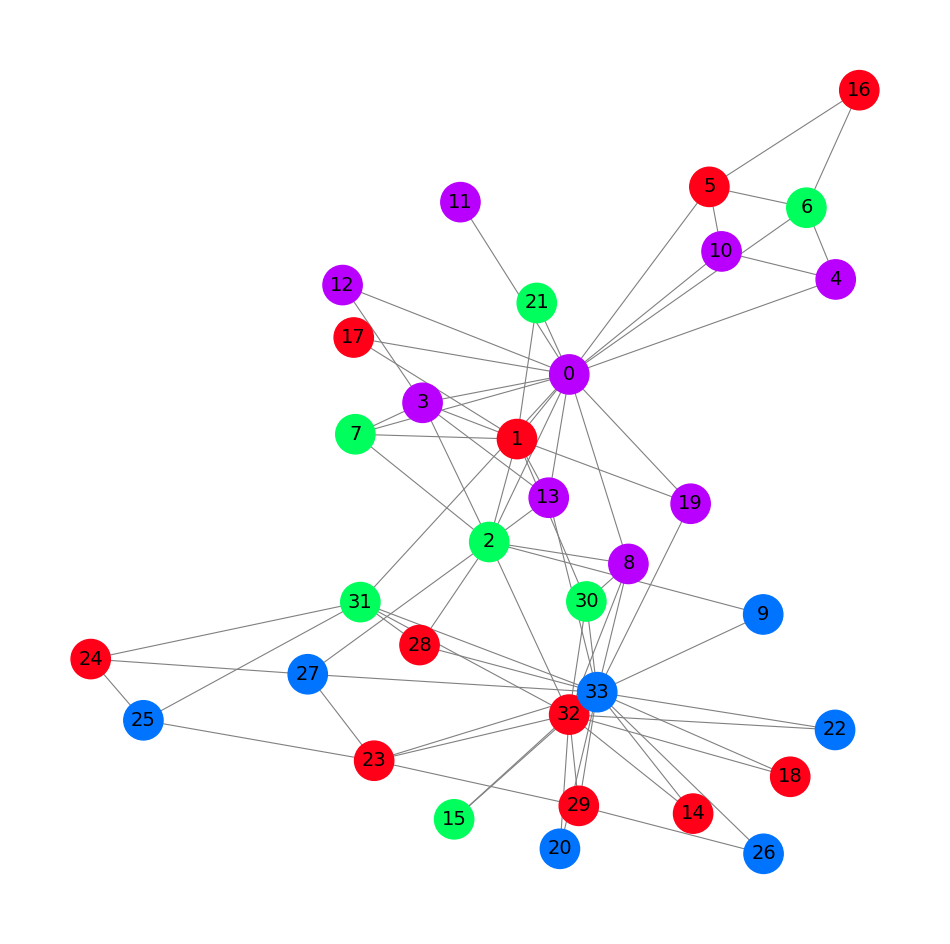

In [ ]:
# Check if the graph is as expected
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

In [ ]:
# Define the model
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, num_countries)
    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

model = GCN()
print(model)


GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)


In [ ]:
# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []

# Training loop
for epoch in range(200):
    optimizer.zero_grad()
    h, z = model(data.x, data.edge_index)
    loss = criterion(z, data.y)
    acc = accuracy(z.argmax(dim=1), data.y)
    loss.backward()
    optimizer.step()
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')


Epoch   0 | Loss: 1.39 | Acc: 26.47%
Epoch  10 | Loss: 1.31 | Acc: 32.35%
Epoch  20 | Loss: 1.18 | Acc: 52.94%
Epoch  30 | Loss: 1.03 | Acc: 55.88%
Epoch  40 | Loss: 0.87 | Acc: 73.53%
Epoch  50 | Loss: 0.72 | Acc: 85.29%
Epoch  60 | Loss: 0.59 | Acc: 88.24%
Epoch  70 | Loss: 0.48 | Acc: 94.12%
Epoch  80 | Loss: 0.38 | Acc: 97.06%
Epoch  90 | Loss: 0.31 | Acc: 97.06%
Epoch 100 | Loss: 0.25 | Acc: 97.06%
Epoch 110 | Loss: 0.21 | Acc: 97.06%
Epoch 120 | Loss: 0.18 | Acc: 97.06%
Epoch 130 | Loss: 0.15 | Acc: 97.06%
Epoch 140 | Loss: 0.13 | Acc: 97.06%
Epoch 150 | Loss: 0.11 | Acc: 97.06%
Epoch 160 | Loss: 0.09 | Acc: 100.00%
Epoch 170 | Loss: 0.08 | Acc: 100.00%
Epoch 180 | Loss: 0.06 | Acc: 100.00%
Epoch 190 | Loss: 0.05 | Acc: 100.00%
